
Title: Adaboost Regressor for Property Prediction
=======
- Created: 2019.10.08
- Updated: 2019.10.21
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents
  -https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor
- https://subinium.github.io/introduction-to-ensemble-2-boosting/
- https://dohk.tistory.com/217
- https://www.whydsp.org/237
- parameter tradeoff: https://stats.stackexchange.com/questions/82323/shrinkage-parameter-in-adaboost/355632#355632

## An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

> class sklearn.ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss=’linear’, random_state=None)[source]



### Boosting
- - -
- 예측 성능이 조금 낮은 약한 분류기(weak classifier)들을 조합하여, 좀 더 좋은 성능을 발휘하는 하나의 강한 분류기(strong classifier)를 만드는 방법
![adaboost](https://www.cc.gatech.edu/~kihwan23/imageCV/Final2005/images/bestrong.JPG)
- Bagging(Bootstrap AGGregatING):모든 week classifier가 상관성 없이 random한 data를 학습했다고 말할수 있지만. Adaboost classifier를 학습시켜 나갈 떄마다 이전 classifier의 학습 결과를 이용한다. 먼저 weak classifier($c_1$)를 학습시킨다. 그리고 나온 틀린 data sample들이 나온다. 이 떄의 오류값($\epsilon$_1)을 이용하여 첫번째 weak classifier의 신뢰도($\alpha_1$)를 더한다. 이 신뢰도는 추후 투표권 갯수에 영향을 미친다. 그리고 나서 틀린 sample들은 다음 classifier가 더 잘 구분할 수 있도록 weight를 높여준다.
$$ \alpha_1 = \frac{1}{2}log(\frac{1-\epsilon_1}{\epsilon_1}) $$
- 그 상태에서 두번째 weak classifier(c_2)를 학습시킨다. weight를 올려주었으므로 당연히 c_1에서 구분하지 못한 것들을 더 잘 구분해낸다. 하지만 그래도 못한 것이 있으므로 그것에 대한 오류값($\epsilon_2$)와 신뢰도($\alpha_2$)를 구한다. 그리고 분류하지 못한 것들의 weight를 또 높여준다. 이과정을 반복한다.
- 모두 학습이 되었으면, 각각의 weak classifier는 투표원이 되고 투표에 따라서 선택이 된다.(H(x))



AdaBoost는 다음과 같은 단계로 진행하게 됩니다.

1. 각 weak 모델에서 학습할 데이터 선택
2. 모든 데이터의 가중치 초기화
3. 한 번 학습 후, error(ϵ) 계산, 모델 별 가중치(α) 계산, 데이터 가중치(D)를 갱신
4. 오류가 0이 되거나, 약한 분류기 수가 최대치에 도달할 때까지 반복
5. 최종적으로 각 분류기의 가중치를 고려한 선형합산으로 예측값 계산


- 과정을 보면 알 수 있듯이, 학습에 있어 error값으로 가중치들을 갱신합니다. 이 과정을 통해 이전 모델이 틀린 데이터를 보다 잘 구분할 수 있도록 가중치를 갱신합니다.

- 하지만 그런 이유로 이 모델은 noisy한 데이터나 이상치(outlier)가 있을 때 취약(sensitive)합니다.



Wikipedia
 - - -
 
 - 샘플 $ x_{1} \dots x_{n} x_1 \dots x_n $
- 목표 결과값 $ y_{1} \dots y_{n},y\in \{-1,1\} y_1 \dots y_n, y \in \{-1, 1\} $
- 초기 가중치 $w_{1,1}\dots w_{n,1} w_{1,1} \dots w_{n,1}$는 $ {\frac {1}{n}}\frac{1}{n} $으로 설정
- 오차함수 $ E(f(x),y,i)=e^{-y_{i}f(x_{i})}$
- 약한 학습기 $h\colon x \rightarrow [-1, 1] $
- $ t=1\dots T$ 에 대하여:

$f_{t}(x)$의 선택:
  - $ \epsilon _{t}$을 최소화하는 약한 학습기 $ h_{t}(x$를 찾는다. 이 때 잘못 분류된 오차의 가중합은 다음과 같다. 
  - $ \epsilon _{t}=\sum _{i}w_{i,t}E(h_{t}(x),y,i)$
  - $ \alpha_t = \frac{1}{2} \ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right) $
  - 총합에 추가:
$ F_{t}(x)=F_{t-1}(x)+\alpha _{t}h_{t}(x)$
  - 가중치 갱신:
$ w_{i,t+1}=w_{i,t}e^{-y_{i}\alpha _{t}h_{t}(x_{i})} $(모든 i에 대하여) 
  - $ w_{i,t+1}$ 의 재정규화 ($ \sum _{i}w_{i,t+1}=1$
  - (추가: 모든 단계에서$\frac{\sum_{h_{t+1}(x_i) = y_i} w_{i,t+1}}{\sum_{h_{t+1}(x_i) \neq y_i} w_{i,t+1}} = \frac{\sum_{h_t(x_i) = y_i} w_{i,t}}{\sum_{h_t(x_i) \neq y_i} w_{i,t}}$는 항상 성립, 이를 이용해 가중치 갱신과정을 간소화할 수 있다.)
- 가중치 $α_t$의 선택
$α_t$는 불연속적 AdaBoost에서 지수오차함수를 분석적으로(analytically) 최소화하는 값으로 정해진다.[4]

 $min \sum_i w_i e^{-y_i h_i \alpha_t}$

$ \forall i,h_{i}\in [-1,1]$라 가정하였을 때, 지수함수의 볼록성(convexity)를 이용하면 다음과 같은 식을 만족한다.

\begin{aligned}\sum _{i}w_{i}e^{-y_{i}h_{i}\alpha _{t}}&\leq \sum _{i}\left({\frac {1-y_{i}h_{i}}{2}}\right)w_{i}e^{\alpha _{t}}+\sum _{i}\left({\frac {1+y_{i}h_{i}}{2}}\right)w_{i}e^{-\alpha _{t}}\\&=\left({\frac {1+\epsilon _{t}}{2}}\right)e^{\alpha _{t}}+\left({\frac {1-\epsilon _{t}}{2}}\right)e^{-\alpha _{t}}\end{aligned}


위식을$ \alpha _{t}t$에 대하여 미분하고 상한값의 최솟값을 구하기 위해 0으로 설정한다.

$${\begin{aligned}\left({\frac {1+\epsilon _{t}}{2}}\right)e^{\alpha _{t}}-\left({\frac {1-\epsilon _{t}}{2}}\right)e^{-\alpha _{t}}&=0\\\alpha _{t}&={\frac {1}{2}}\ln \left({\frac {1-\epsilon _{t}}{1+\epsilon _{t}}}\right)\end{aligned}}$$

이러한 관계는 $ h_{i}\in \{-1,1\}$일 때만 성립한다는 것에 주의해야하지만, 이외의 경우에도 좋은 초기추측이 될 수 있다. 예로, 약한 학습기가 편향되어있거나$ h(x)\in \{a,b\},a\neq -b$, 여러 결과를 가지거나($ h(x)\in \{a,b,\dots ,n\}$), 아니면 다른 어떤 함수일 경우($ h(x)\in \mathbb {R} $에도 활용할 수 있다. 이러한 경우 약한 학습기와 계수는 모든 가능한 $ \alpha ,h$로부터 $ f_{t}=\alpha _{t}h_{t}(x)$가 정해지는 단 한 번의 단계를 통해 선택될 수 있으며, 이 때의 $ \alpha ,h$는 어떤 수치적인 탐색기법을 통해 $ \sum _{i}w_{i,t}e^{-y_{i}f_{t}(x_{i})}$를 최소화하는 값으로 정해진다.


HyperParameters
---


- **base_estimator**[object, optional (default=None)]: The base estimator from which the boosted ensemble is built. Support for sample weighting is required. If None, then the base estimator is DecisionTreeRegressor(max_depth=3)

- **n_estimators**[integer, optional (default=50)]: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

- **learning_rate**[float, optional (default=1.)]: Learning rate shrinks the contribution of each regressor by learning_rate. There is a trade-off between learning_rate and n_estimators.

- **loss**[‘linear’, ‘square’, ‘exponential’}, optional (default=’linear’]: The loss function to use when updating the weights after each boosting iteration.

- **random_state**[int, RandomState instance or None, optional (default=None)]: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- learning_rate L을 줄인다면
  - L은 가중치를 갱신하는 데 쓰이는 α값에 붙는 상수(1이하 양의 실수)입니다.
  - 이는 가중치 갱신의 크기/스케일을 줄입니다.
  - 그렇기에 weak classifier의 결정 경계들(decision boundaries)간의 차이가 적습니다. (모델의 단순화)
- 반복 횟수 M을 늘린다면
  - 사용하는 weak classifier의 수를 늘고, 최종적으로 이를 선형으로 더해야합니다.
  - 그렇기에 분류기의 결정 경계가 더욱 다양해지고 복잡해집니다.

- 이런 이유로 L과 M은 trade-off 관계라고 생각할 수 있습니다. 그렇기에 둘을 잘 조정하여 사용하는 것이 이 알고리즘의 핵심입니다.

Attributes
---

- **estimators_**[list of classifiers]: The collection of fitted sub-estimators.

- **estimator_weights_**[array of floats]: Weights for each estimator in the boosted ensemble.

- **estimator_errors_**[array of floats]: Regression error for each estimator in the boosted ensemble.

- **feature_importances_**[array of shape = [n_features]]: Return the feature importances (the higher, the more important the feature).

Method
---

- fit(self, X, y[, sample_weight])	Build a boosted regressor from the training set (X, y).
- get_params(self[, deep])	Get parameters for this estimator.
- predict(self, X)	Predict regression value for X.
- score(self, X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
- set_params(self, \*\*params)	Set the parameters of this estimator.
- staged_predict(self, X)	Return staged predictions for X.
- staged_score(self, X, y[, sample_weight])	Return staged scores for X, y.


Setup
---

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
sklearn.__version__

'0.21.3'

Get the data
============

In [3]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data.csv
User uploaded file"3MA_data.csv" with length21539 bytes


In [4]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df.head()


,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),5k_RE,5k_IM,5k_time,5k_voltage
0,193.928416,0.000000,2.247535,7.353994,-0.617027,412.0,8.103753,0.048710,0.0,5.330770
1,193.928416,7.832161,2.249186,7.330924,-0.934697,412.0,8.084683,0.057399,3.2,5.329357
2,193.928416,7.825444,2.248753,7.367316,-0.574723,412.0,8.099559,0.125401,6.4,5.331381
3,193.928416,7.813692,2.249833,7.345533,-0.862965,412.0,8.103011,0.153286,9.6,5.329095
4,193.928416,7.780144,2.247326,7.350974,-0.681030,412.0,8.122078,0.185302,12.8,5.333564


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.4 KB


2 Variable (1k_RE & 1k_IM) data
---

In [0]:
df = df.loc[:,["yield stress", "elongation", "1k_RE", "1k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 209
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.5 KB


6 Variable (1k_voltage, 1k_RE, 1k_IM, 5k_voltage, 5k_RE, 5k_Im) data
---

In [7]:
df = df.loc[:,["yield stress", "elongation","1k_voltage", "1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [8]:
df.describe()

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_voltage,5k_RE,5k_IM
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,331.194462,5.071727,2.200824,7.184671,-0.994367,5.312965,8.076179,0.057261
std,60.202631,1.598025,0.022435,0.078204,0.122292,0.005074,0.012742,0.093277
min,193.928416,0.000000,2.173205,7.076378,-1.220670,5.304340,8.045659,-0.305125
25%,294.251701,3.747314,2.181697,7.121649,-1.065305,5.309558,8.068358,0.011753
50%,346.269052,5.080847,2.193432,7.162842,-1.015719,5.312546,8.075137,0.058024
75%,380.555745,6.401437,2.217603,7.245272,-0.922856,5.315220,8.084260,0.108549
max,406.890446,7.832161,2.250206,7.367316,-0.574723,5.333564,8.122078,0.389185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe58822b048>,
      dtype=object)

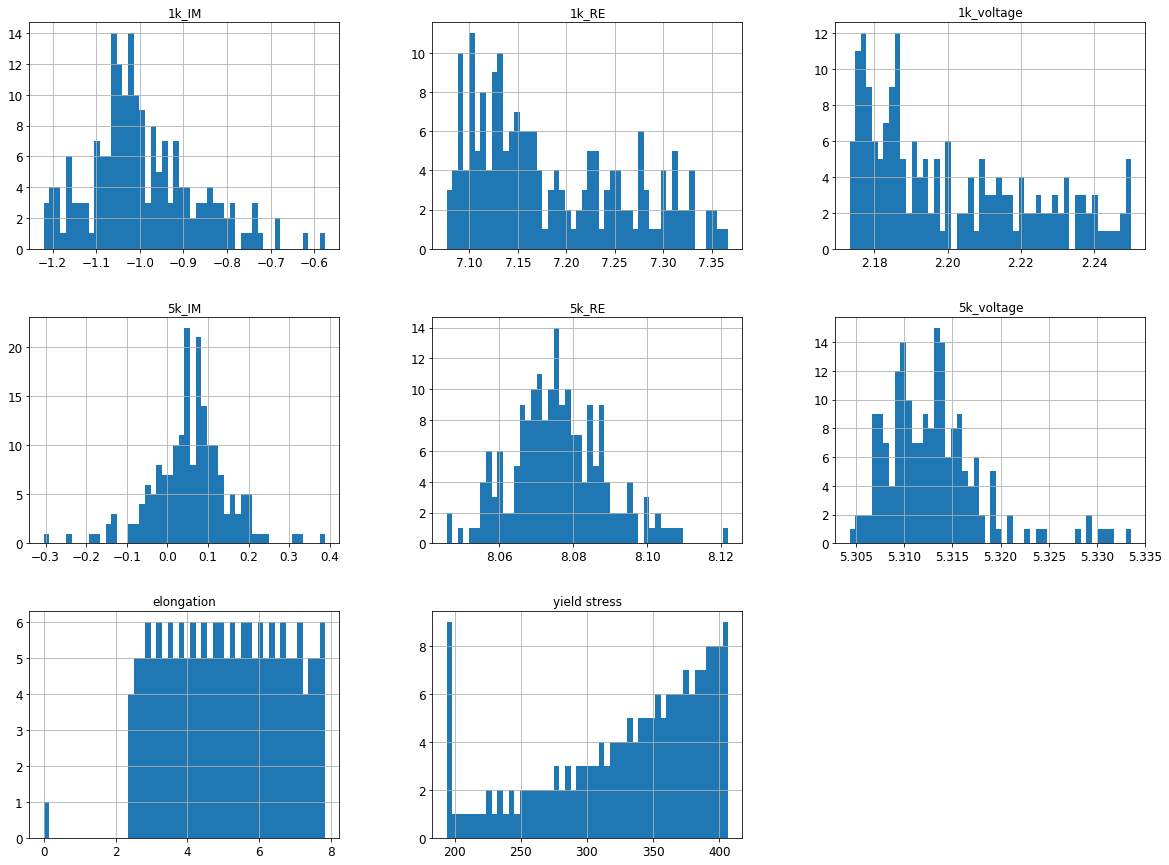

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_voltage", "1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [12]:
len(X_test)

38

In [0]:
#X_train.to_csv("X_train.csv", mode='w')

Discover and visualize the data to gain insights
===

In [14]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 51 to 102
Data columns (total 6 columns):
1k_voltage    152 non-null float64
1k_RE         152 non-null float64
1k_IM         152 non-null float64
5k_voltage    152 non-null float64
5k_RE         152 non-null float64
5k_IM         152 non-null float64
dtypes: float64(6)
memory usage: 8.3 KB


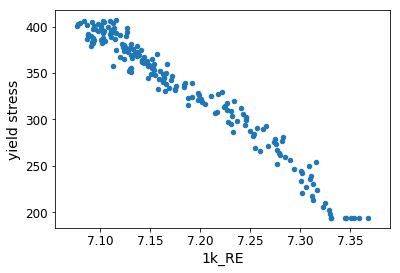

In [16]:
df_copy.plot(kind="scatter", x="1k_RE", y="yield stress")

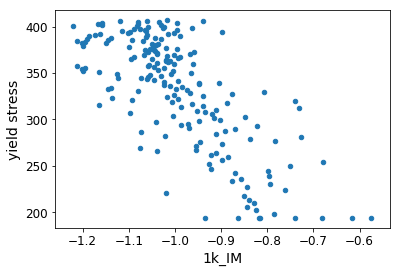

In [17]:
df_copy.plot(kind="scatter", x="1k_IM", y="yield stress")

In [18]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_voltage,5k_RE,5k_IM
yield stress,1.000000,-0.886806,-0.994657,-0.980480,-0.732689,-0.581111,-0.441823,-0.082548
elongation,-0.886806,1.000000,0.897797,0.883247,0.591942,0.294499,0.290037,0.053422
1k_voltage,-0.994657,0.897797,1.000000,0.987401,0.736476,0.557735,0.421207,0.079463
1k_RE,-0.980480,0.883247,0.987401,1.000000,0.816920,0.539938,0.405007,0.075760
1k_IM,-0.732689,0.591942,0.736476,0.816920,1.000000,0.477172,0.310078,0.035729
5k_voltage,-0.581111,0.294499,0.557735,0.539938,0.477172,1.000000,0.596119,0.079823
5k_RE,-0.441823,0.290037,0.421207,0.405007,0.310078,0.596119,1.000000,0.081091
5k_IM,-0.082548,0.053422,0.079463,0.075760,0.035729,0.079823,0.081091,1.000000


In [19]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)


# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
5k_IM          -0.082548
5k_RE          -0.441823
5k_voltage     -0.581111
1k_IM          -0.732689
elongation     -0.886806
1k_RE          -0.980480
1k_voltage     -0.994657
Name: yield stress, dtype: float64

In [20]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
1k_voltage      0.897797
1k_RE           0.883247
1k_IM           0.591942
5k_voltage      0.294499
5k_RE           0.290037
5k_IM           0.053422
yield stress   -0.886806
Name: elongation, dtype: float64

In [21]:
print(X_train)

     1k_voltage     1k_RE     1k_IM  5k_voltage     5k_RE     5k_IM
51     2.215403  7.245305 -0.903072    5.312309  8.068984  0.092698
35     2.225431  7.275967 -0.897505    5.312577  8.066472  0.074681
118    2.186764  7.151657 -1.049820    5.310293  8.075633  0.080307
60     2.210931  7.240860 -0.730820    5.310039  8.070268  0.101880
161    2.177262  7.109777 -1.014860    5.316873  8.084991  0.013395
76     2.203891  7.221163 -0.808060    5.309615  8.066271  0.082328
69     2.206140  7.200744 -0.992840    5.313729  8.077973  0.010207
29     2.229327  7.279347 -0.921136    5.315442  8.068980  0.018230
128    2.185847  7.134817 -1.039134    5.309051  8.053031  0.052793
152    2.179460  7.086552 -1.190011    5.314057  8.060679  0.097636
165    2.177385  7.126876 -0.898958    5.315302  8.089053 -0.305125
31     2.228250  7.259413 -1.038934    5.314041  8.088805  0.109319
153    2.178293  7.102217 -1.044152    5.314748  8.082829  0.090453
12     2.240065  7.312785 -0.839329    5.316171 

## Feature Scaling

In [22]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train = imputer.fit_transform(ys_train)
ys_train_std = data_pipeline.fit_transform(ys_train)


el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train = imputer.fit_transform(el_train)
el_train_std = data_pipeline.fit_transform(el_train)

X_test = imputer.fit_transform(X_test)
X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test = imputer.fit_transform(ys_test)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test = imputer.fit_transform(el_test)
el_test_std = data_pipeline.fit_transform(el_test)


#print(X_train_std)

ys_test_std


array([[ 1.20451104],
       [ 1.24780227],
       [ 0.52677366],
       [-0.17385975],
       [ 0.39560826],
       [-1.74451944],
       [-2.11032816],
       [-1.69025064],
       [ 0.8728661 ],
       [ 0.68318176],
       [ 0.50120669],
       [ 0.31301706],
       [-1.58798893],
       [ 1.10455619],
       [ 0.16493537],
       [ 0.63699534],
       [ 0.43662284],
       [-0.15560221],
       [-0.35878156],
       [-0.70559729],
       [-1.08510976],
       [-1.31649814],
       [ 1.01666267],
       [ 0.34053471],
       [-0.1179416 ],
       [ 0.71827633],
       [ 0.67133709],
       [-1.53925396],
       [-0.62359546],
       [ 0.00440384],
       [ 1.14010928],
       [-0.1366698 ],
       [-2.24669042],
       [ 0.77487445],
       [ 1.1503678 ],
       [ 1.09467335],
       [ 0.0548558 ],
       [ 0.5385152 ]])

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [0]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")
#np.savetxt("x_train_std.csv", X_train_std, delimiter=",")

In [25]:
X_train_std.shape

(152, 6)

In [26]:
ys_train.shape

(152, 1)

In [0]:
np.random.seed(42)

Select and train a Adaboost regression model
===

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/AdaBoost_Regression/yield_stress_6V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

adb_reg = AdaBoostRegressor(random_state=42)
adb_reg.fit(X_train_std, ys_train_std)
ys_predictions_adb= adb_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
adb_mse = mean_squared_error(ys_train, ys_predictions_adb)
adb_rmse = np.sqrt(adb_mse)
adb_rmse


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.937917954899468

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = [
    {'base_estimator': [DecisionTreeRegressor(max_depth=3, random_state=42), 
                        DecisionTreeRegressor(max_depth=10, random_state=42), 
                        DecisionTreeRegressor(max_depth=20, random_state=42)],
     'n_estimators': [30,50,70,100], 'learning_rate': [0.5,0.75,1,1.5,2,2.5],
     'loss':['linear', 'square', 'exponential'],  'random_state': [42]
    } ]

adb_reg = AdaBoostRegressor(random_state=42)
grid_search = GridSearchCV(adb_reg, param_grid, cv=30,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, ys_train_std)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=42),
             iid='warn', n_jobs=None,
             param_grid=[{'base_estimator': [DecisionTreeRegressor(criterion='mse',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split...
                                                                   min_samples_leaf=1,
                                                                   min_samples_split=2,


In [31]:
grid_search.best_estimator_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=20,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=42,
                                                       splitter='best'),
                  learning_rate=1, loss='linear', n_estimators=50,
                  random_stat

In [32]:
grid_search.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=42, splitter='best'),
 'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.07901415933931079 {'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best'), 'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 30, 'random_state': 42}
0.0738330250535851 {'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best'), 'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 50, 'random_state': 42}
0.07328098118881891 {'base_estimator': DecisionTreeRegres

In [0]:
ys_adb_final_model = grid_search.best_estimator_

In [35]:
"""
from sklearn.tree import DecisionTreeRegressor

ys_adb_final_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=20,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=42,
                                                       splitter='best'),
                  learning_rate=2, loss='exponential', n_estimators=70,
                  random_state=42)
ys_adb_final_model.fit(X_train_std, ys_train_std)
"""

"\nfrom sklearn.tree import DecisionTreeRegressor\n\nys_adb_final_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',\n                                                       max_depth=20,\n                                                       max_features=None,\n                                                       max_leaf_nodes=None,\n                                                       min_impurity_decrease=0.0,\n                                                       min_impurity_split=None,\n                                                       min_samples_leaf=1,\n                                                       min_samples_split=2,\n                                                       min_weight_fraction_leaf=0.0,\n                                                       presort=False,\n                                                       random_state=42,\n                                                       splitter='best'),\n          

In [36]:
# Feature importance of 2 variables

adb_feature_importance = ys_adb_final_model.feature_importances_
print("feature importances\n")
print("1kHz_Re: ",adb_feature_importance[0])
print("1kHz_Im: ",adb_feature_importance[1])

feature importances

1kHz_Re:  0.8919774631256857
1kHz_Im:  0.09773187792468924


In [37]:
# Feature importance of 6 variables

adb_feature_importance = ys_adb_final_model.feature_importances_
print("feature importances\n")
print("1kHz_voltage ",adb_feature_importance[0])
print("1kHz_Re: ",adb_feature_importance[1])
print("1kHz_Im: ",adb_feature_importance[2])
print("5kHz_voltage: ",adb_feature_importance[3])
print("5kHz_Re: ",adb_feature_importance[4])
print("5kHz_Im: ",adb_feature_importance[5])


feature importances

1kHz_voltage  0.8919774631256857
1kHz_Re:  0.09773187792468924
1kHz_Im:  0.0007584892976558395
5kHz_voltage:  0.008511417993132172
5kHz_Re:  0.000475549828523213
5kHz_Im:  0.0005452018303138074


In [38]:
ys_adb_train_predictions = ys_adb_final_model.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
ys_adb_train_mse = mean_squared_error(ys_train, ys_adb_train_predictions)
ys_adb_train_rmse = np.sqrt(ys_adb_train_mse)
ys_adb_train_rmse

0.2998813538938574

In [39]:
ys_adb_test_predictions = ys_adb_final_model.predict(X_test_std) * np.std(ys_test) + np.mean(ys_test)
ys_adb_test_mse = mean_squared_error(ys_test,ys_adb_test_predictions)
ys_adb_test_rmse = np.sqrt(ys_adb_test_mse)
ys_adb_test_rmse

3.967797548854624

## Central Limit Theorem

In [40]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(216,)
Combinations


In [41]:
mean_train_score =cvres['mean_train_score']
print(mean_train_score)

[-3.35086388e-03 -2.81314420e-03 -2.63676699e-03 -2.48087907e-03
 -2.69789693e-03 -2.13380943e-03 -1.89829654e-03 -1.71640802e-03
 -3.07368933e-03 -2.67616821e-03 -2.47959503e-03 -2.31575467e-03
 -3.09289601e-03 -2.69651726e-03 -2.52683972e-03 -2.37279262e-03
 -2.63399875e-03 -2.03807166e-03 -1.81859969e-03 -1.64256578e-03
 -3.04669965e-03 -2.48892539e-03 -2.31994965e-03 -2.29169941e-03
 -2.78762080e-03 -2.38812052e-03 -2.15814768e-03 -2.03528132e-03
 -2.55724226e-03 -2.03916060e-03 -1.78047351e-03 -1.61357577e-03
 -2.85938816e-03 -2.45564613e-03 -2.25265874e-03 -2.22790344e-03
 -2.82223797e-03 -2.35884052e-03 -2.16509892e-03 -2.06520347e-03
 -3.09303524e-03 -2.64954652e-03 -2.29470303e-03 -2.11664199e-03
 -2.75569066e-03 -2.40530426e-03 -2.35879262e-03 -2.26506258e-03
 -2.56397790e-03 -2.12409411e-03 -1.96867103e-03 -1.84691553e-03
 -9.53803056e-02 -1.31185889e-01 -1.72730526e-01 -2.21581699e-01
 -2.52464879e-03 -2.30670079e-03 -2.15666974e-03 -2.09173168e-03
 -2.56317306e-03 -2.15328

In [42]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)

[-0.00624324 -0.00545132 -0.0053701  -0.00517514 -0.0048923  -0.00405283
 -0.00363943 -0.00359624 -0.00676167 -0.00573722 -0.00512221 -0.00484299
 -0.00491843 -0.00445683 -0.00420223 -0.00411193 -0.00484699 -0.00401381
 -0.0039104  -0.00356736 -0.00568793 -0.00472104 -0.00449203 -0.00425519
 -0.00472001 -0.00456208 -0.0040799  -0.00396802 -0.00366822 -0.00318421
 -0.00321823 -0.00303994 -0.00554969 -0.00462183 -0.0042862  -0.00423724
 -0.00488987 -0.00446014 -0.00433536 -0.00406885 -0.00501349 -0.00463411
 -0.00445303 -0.00388511 -0.00508201 -0.00464325 -0.00441522 -0.00453658
 -0.00433639 -0.00398    -0.00366104 -0.0034767  -0.11805049 -0.13449814
 -0.19267474 -0.2375341  -0.00445278 -0.0041038  -0.00398068 -0.00386154
 -0.00408369 -0.0036757  -0.00330062 -0.0032831  -0.52410784 -1.22670668
 -0.88952027 -0.67911671 -0.00462557 -0.00426879 -0.00402298 -0.00394417
 -0.00282352 -0.00274773 -0.00276683 -0.00275337 -0.00329415 -0.00336029
 -0.00334123 -0.00307944 -0.00292822 -0.00300324 -0

In [43]:
std_train_score =cvres['std_train_score']
print(std_train_score)

[5.38043512e-04 3.59408340e-04 3.82619440e-04 4.48889778e-04
 4.03514554e-04 3.40996101e-04 2.88059777e-04 2.59436008e-04
 3.97780458e-04 4.20143069e-04 2.58322851e-04 2.79843454e-04
 5.86485325e-04 6.00984001e-04 6.48038624e-04 6.67884948e-04
 5.46395139e-04 3.62955488e-04 2.73209963e-04 2.34097172e-04
 4.63529765e-04 2.93062826e-04 3.35522647e-04 3.33138602e-04
 4.53308683e-04 4.75074123e-04 4.74735013e-04 4.71484578e-04
 5.65489423e-04 3.52744505e-04 3.04017259e-04 2.31203052e-04
 4.35613742e-04 3.22130067e-04 3.31229759e-04 3.04713860e-04
 4.43913141e-04 4.47790350e-04 5.20730804e-04 5.41547832e-04
 8.68354063e-04 6.87599916e-04 5.10654632e-04 5.14949205e-04
 4.93838610e-04 3.80779901e-04 4.29768585e-04 3.78169779e-04
 4.33790009e-04 3.38045214e-04 2.85201727e-04 2.27113880e-04
 1.17330445e-01 1.16576556e-01 1.46734118e-01 1.71679858e-01
 3.74686920e-04 3.11908173e-04 2.66810532e-04 2.66678991e-04
 5.95127291e-04 3.84014338e-04 2.68166675e-04 2.36802028e-04
 4.68514953e-01 1.720470

In [44]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.00574926 0.00506974 0.0051237  0.00507764 0.00354692 0.00276937
 0.00262654 0.00276716 0.0059946  0.00496543 0.00399598 0.00376836
 0.0036535  0.00353131 0.00337346 0.00313345 0.00344612 0.00297716
 0.00290524 0.0025735  0.00486547 0.00388776 0.00357784 0.00331775
 0.00309055 0.00329013 0.00288774 0.00280209 0.00254659 0.00231524
 0.00223167 0.00224191 0.00398271 0.0035288  0.0030198  0.00296393
 0.00319878 0.00311724 0.00300075 0.00267948 0.00307607 0.00325438
 0.00326359 0.00300728 0.00374769 0.00361069 0.00334799 0.00321306
 0.00293835 0.00287195 0.0025811  0.00253997 0.16500906 0.16450259
 0.21849536 0.20223317 0.00368784 0.00273455 0.002617   0.00232206
 0.00335841 0.00304536 0.00295663 0.00262267 0.63603013 1.98334945
 1.62110293 0.64595179 0.00361289 0.00358669 0.00305519 0.00293605
 0.0030677  0.00310668 0.00311218 0.00311935 0.00337223 0.00365556
 0.00358422 0.00330546 0.00324092 0.0033671  0.00455527 0.0035201
 0.003656   0.00316298 0.00319143 0.003214   0.00468764 0.00362

In [45]:
!ls /content/gdrive

'My Drive'


In [46]:
with open('/content/gdrive/My Drive/validation/cvscores/Adaboost/yield_stress/ADB_6V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")


!cat /content/gdrive/My\ Drive/validation/cvscores/Adaboost/yield_stress/ADB_6V.txt



mean_fit_time: [0.0343887  0.05506799 0.07085155 0.09515777 0.03457635 0.05790308
 0.07798195 0.11454803 0.03541558 0.05760238 0.08046223 0.11539616
 0.03334297 0.05236448 0.0695627  0.09205126 0.03460765 0.05684707
 0.07937954 0.11587056 0.03579792 0.05957636 0.08181366 0.11784184
 0.03513284 0.05820251 0.07809753 0.10890231 0.03485878 0.05867641
 0.08085243 0.11448662 0.03539089 0.05854254 0.08298126 0.11734875
 0.03382081 0.0551732  0.07422116 0.10279001 0.03345926 0.054782
 0.07446059 0.10866223 0.03456533 0.05915807 0.08117102 0.11577211
 0.03449356 0.0580366  0.08079354 0.10982617 0.03005352 0.04967898
 0.06917953 0.09638268 0.03481005 0.05677848 0.07977688 0.11378053
 0.03436369 0.05572139 0.07718771 0.11195687 0.02946083 0.04962088
 0.06778115 0.09588443 0.03556311 0.05767138 0.08002091 0.11611225
 0.04198059 0.06982929 0.09545738 0.13649162 0.04043625 0.06762144
 0.09205308 0.13190245 0.04223545 0.07146828 0.09593791 0.1376943
 0.0408124  0.06730934 0.09257018 0.13389266 0.03

Train data plotting
---

Saving figure TrainPrediction_with_6V_ADB_ParamFitted


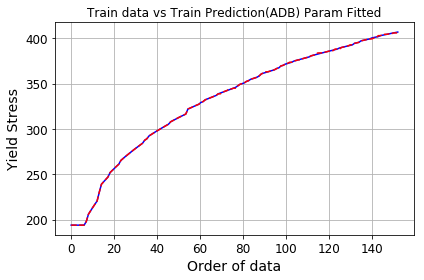

In [47]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
ys_train_sort = np.sort(ys_train, axis=None)
ys_adb_train_predictions_sort= np.sort(ys_adb_train_predictions, axis=None)
plt.plot(xx,ys_train_sort,"b-", xx, ys_adb_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(ADB) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_6V_ADB_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_6V_ADB_ParamFitted


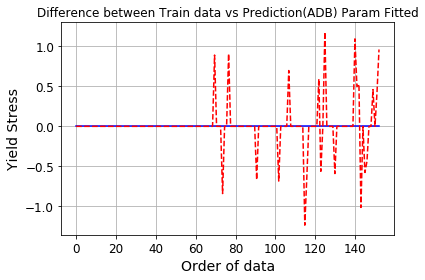

In [48]:
# Difference of train data
difference = ys_train_sort - ys_adb_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(ADB) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_6V_ADB_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_6V_ADB_ParamFitted


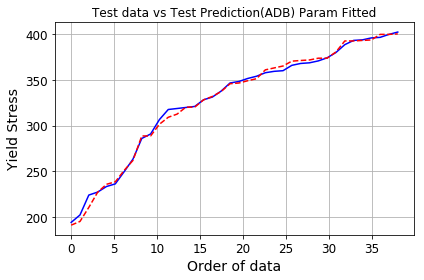

In [49]:

xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
ys_test_sort = np.sort(ys_test, axis=None)
ys_adb_test_predictions_sort= np.sort(ys_adb_test_predictions, axis=None)
plt.plot(xx,ys_test_sort,"b-", xx, ys_adb_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(ADB) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_6V_ADB_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_6V_ADB_ParamFitted


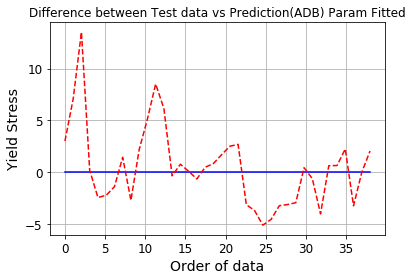

In [50]:
# Difference of train data
difference = ys_test_sort - ys_adb_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(ADB) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_6V_ADB_ParamFitted")


## Extracting files

In [51]:
!ls images/BestHyperParameter/AdaBoost_Regression/yield_stress_6V/


Difference_between_Test_data_vs_Prediction_6V_ADB_ParamFitted.png
Difference_between_Train_data_vs_Prediction_6V_ADB_ParamFitted.png
TestPrediction_with_6V_ADB_ParamFitted.png
TrainPrediction_with_6V_ADB_ParamFitted.png


In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM fiels to local
files.download('images/BestHyperParameter/AdaBoost_Regression/yield_stress_6V/TrainPrediction_with_6V_ADB_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/AdaBoost_Regression/yield_stress_6V/TestPrediction_with_6V_ADB_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/AdaBoost_Regression/yield_stress_6V/Difference_between_Train_data_vs_Prediction_6V_ADB_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/AdaBoost_Regression/yield_stress_6V/Difference_between_Test_data_vs_Prediction_6V_ADB_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/Adaboost/yield_stress/ADB_6V.txt')

#### elongation